In [1]:
import pandas as pd
import numpy as np
import nltk
import os
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import scikitplot as skplt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aom2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
for f in os.listdir("content"):
    print(f)

BinMLResultsada_tfidf_binmat.png
BinMLResultsgb_tfidf_binmat.png
BinMLResultsknn_tfidf_binmat.png
BinMLResultslr_tfidf_binmat.png
BinMLResultsnb_tfidf_binmat.png
BinMLResultsrf_tfidf_binmat.png
BinMLResultssvm_countvec_binmat.png
BinMLResultssvm_tfidf_binmat.png
final_testset.xlsx
final_trainset.xlsx


In [3]:
df_bin = pd.read_excel("content/final_trainset.xlsx")
df_bin['binary2_label'].value_counts()
df_test = pd.read_excel("content/final_testset.xlsx")
df_bin['ABSTRACT'] = df_bin['ABSTRACT'].apply(str.lower)
df_test['ABSTRACT'] = df_test['ABSTRACT'].apply(str.lower)

In [7]:
def bin_model(model_type, vectortype,C=1):
    if vectortype == "tfidf":
        vectorizer = TfidfVectorizer()
    elif vectortype == "countvec":
        vectorizer = CountVectorizer()

    bow_train = np.array(vectorizer.fit_transform(list(df_bin['ABSTRACT'])).todense())
    feature_names = vectorizer.get_feature_names_out()

    X_train = bow_train
    y_train = df_bin['binary2_label']
     # Print the feature names
#     print("Feature names:", feature_names)

    if model_type == 'nb':
        model = MultinomialNB().fit(X_train, y_train)
    elif model_type == 'lr':
        model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
    elif model_type == 'svm':
        model = LinearSVC(C=C).fit(X_train, y_train)
    elif model_type == 'knn':
        model = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
    elif model_type == 'rf':
        model = RandomForestClassifier().fit(X_train, y_train)
    elif model_type == 'ada':
        model = AdaBoostClassifier(n_estimators=50).fit(X_train, y_train)
    elif model_type == 'gb':
        model = GradientBoostingClassifier(n_estimators=50).fit(X_train, y_train)

    print('Training Accuracy:', model.score(X_train, y_train))

    bow_test = vectorizer.transform(list(df_test['ABSTRACT']))
    X_test = bow_test
    y_test = df_test['binary2_label']
    y_pred = model.predict(X_test)
    
    acc=accuracy_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred, average="macro")

    print('Test Accuracy:', accuracy_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred, average="macro"))
    print('Precision:', precision_score(y_test, y_pred, average="macro"))
    print('Recall:', recall_score(y_test, y_pred, average="macro"))

    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(121)

    skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Binary Confusion Matrix",
                                    ax=ax1)
    plt.savefig('content/BinMLResults' + model_type + '_' + vectortype + '_binmat.png')
    # return y_test, y_pred
    return X_train,y_train,feature_names
#     return f1_score,accuracy_score

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')


C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training Accuracy: 1.0
Test Accuracy: 0.7740384615384616
F1 score: 0.7653609831029186
Precision: 0.7715537283116756
Recall: 0.7623100016547291


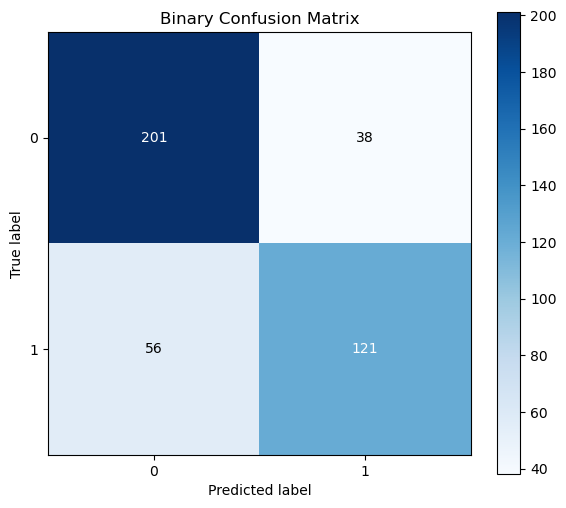

In [9]:

X_train,y_train,feature_names=bin_model('svm', 'countvec',C=0.05)

C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training Accuracy: 0.8217621812673567
Test Accuracy: 0.7740384615384616
F1 score: 0.7601805514669806
Precision: 0.7801470015323482
Recall: 0.7549819161761577


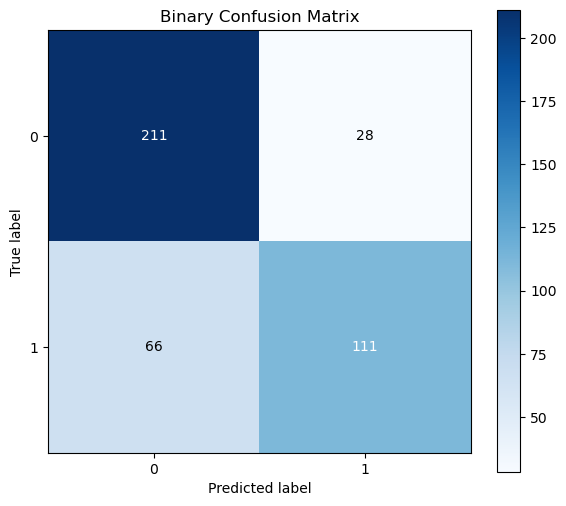

In [10]:
 X_train,y_train,feature_names=bin_model('svm', 'tfidf',C=0.05)

C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy: 1.0
Test Accuracy: 0.7740384615384616
F1 score: 0.7644337349397591
Precision: 0.7727598566308244
Recall: 0.7608443845590147


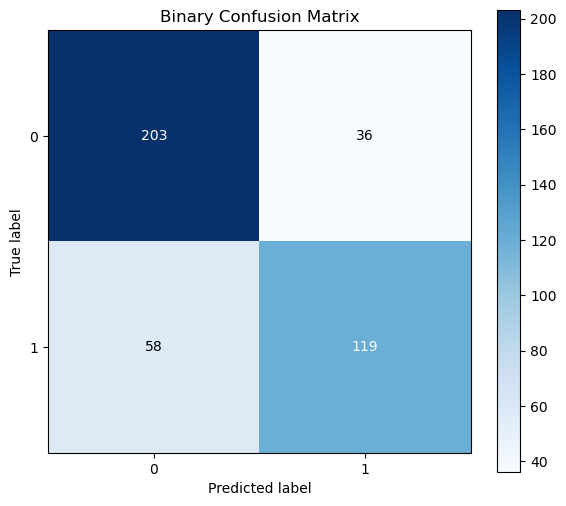

In [12]:
 X_train,y_train,feature_names=bin_model('svm', 'countvec',C=0.1)

C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training Accuracy: 0.8579904064630144
Test Accuracy: 0.7932692307692307
F1 score: 0.7826382813259454
Precision: 0.7969552133120906
Recall: 0.7775807862326549


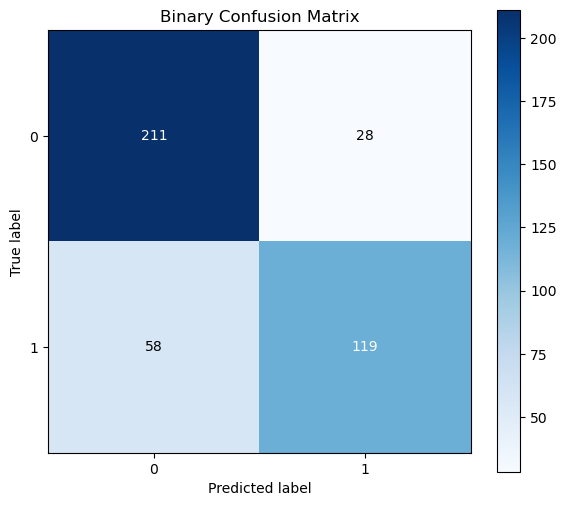

In [13]:
 X_train,y_train,feature_names=bin_model('svm', 'tfidf',C=0.1)

C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy: 1.0
Test Accuracy: 0.78125
F1 score: 0.7721809986339045
Precision: 0.7801282051282051
Recall: 0.7685861522823441


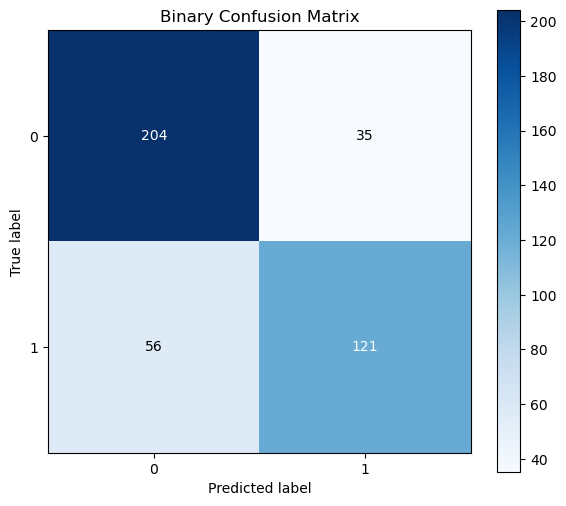

In [14]:
 X_train,y_train,feature_names=bin_model('svm', 'countvec',C=0.5)

C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training Accuracy: 0.9580913910628629
Test Accuracy: 0.7932692307692307
F1 score: 0.7844819277108434
Precision: 0.7933259176863181
Recall: 0.7805120204240834


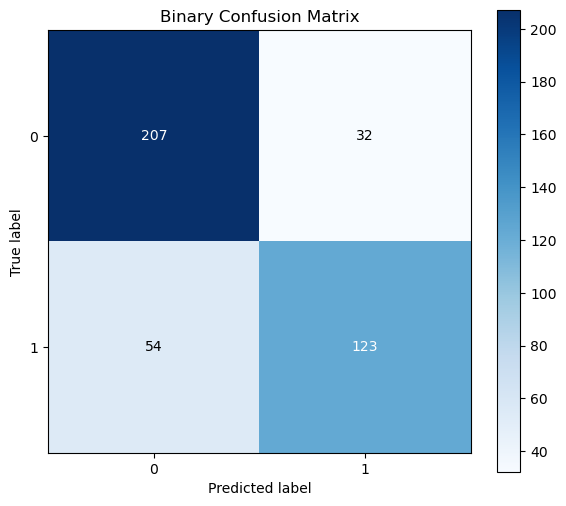

In [15]:
 X_train,y_train,feature_names=bin_model('svm', 'tfidf',C=0.5)

C:\Users\aom2\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training Accuracy: 0.9843473870234789
Test Accuracy: 0.78125
F1 score: 0.7721809986339045
Precision: 0.7801282051282051
Recall: 0.7685861522823441


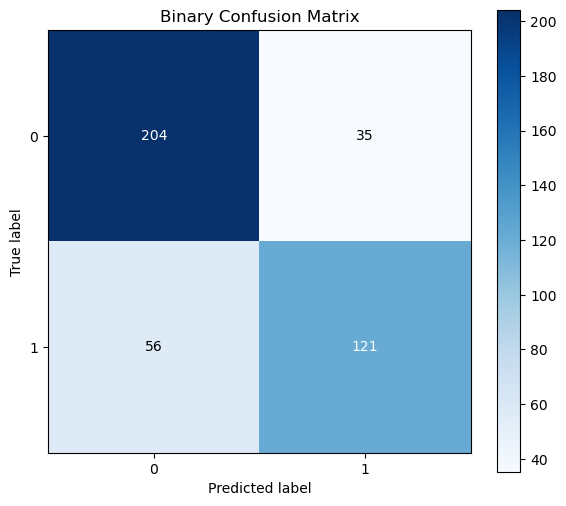

In [16]:
 X_train,y_train,feature_names=bin_model('svm', 'tfidf',C=1)